In [35]:
from sklearn.cluster import KMeans
import pandas as pd
#from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#iris = load_iris()
iris=pd.read_csv("../datasets/IRIS.csv")

In [37]:
type(iris)

pandas.core.frame.DataFrame

In [38]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris["species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [40]:
#same above
iris["species"].groupby(iris["species"],axis=0).count()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [41]:
x=iris.drop("species",axis=1)

In [42]:
y=iris.species

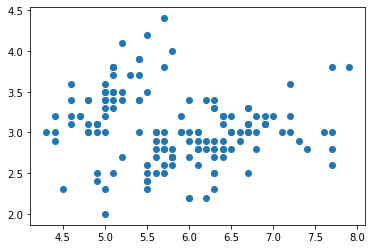

In [43]:
plt.scatter(iris.sepal_length,iris.sepal_width)
plt.show()

In [44]:
model=KMeans(n_clusters=3)

In [45]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
#dir(model)

In [47]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [48]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [49]:
error_values=[]
ks=np.arange(1,5)
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(x)
    error_values.append(model.inertia_)

In [50]:
error_values

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571]

In [51]:
pd.crosstab(y,model.labels_)

col_0,0,1,2,3
species,,,,
Iris-setosa,50,0,0,0
Iris-versicolor,0,23,0,27
Iris-virginica,0,17,32,1


In [52]:
import seaborn as sns

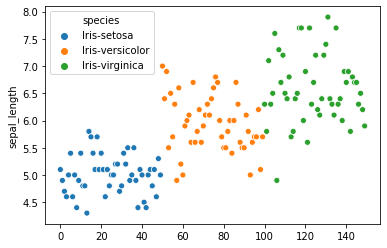

In [59]:
sns.scatterplot(x.index,x.sepal_length,hue=y)